In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


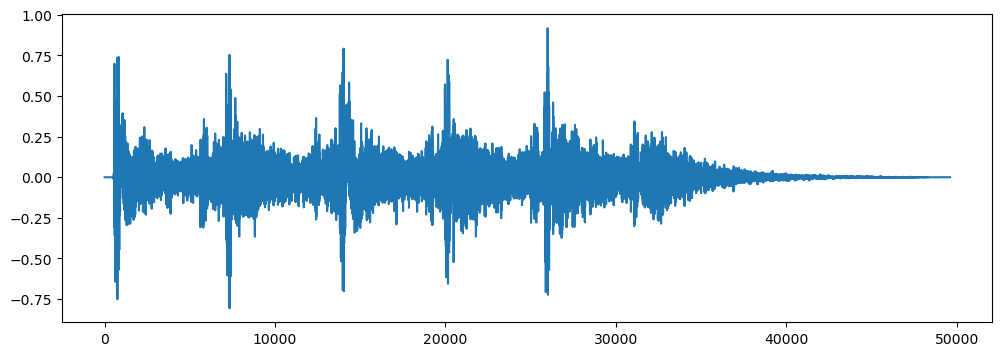

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
#Here Librosa converts the signal to mono, meaning the channel will always be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

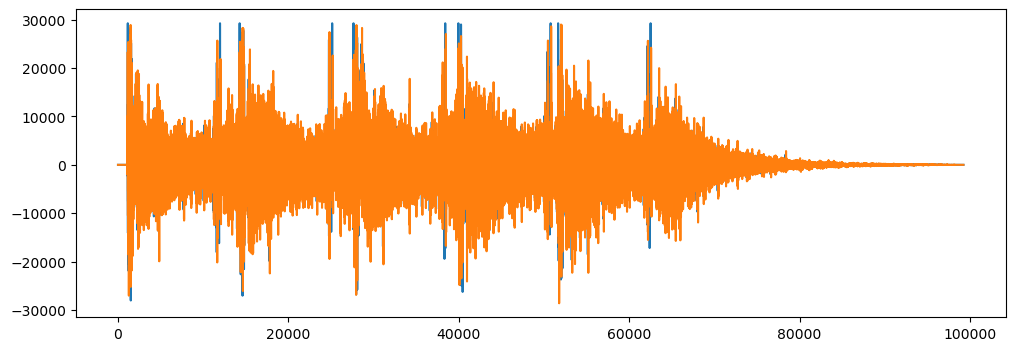

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
'''Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. 
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. 
These audio representations will allow us to identify features for classification.'''

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


mfccs

In [8]:
mfccs

array([[-1.2721312e+02,  8.0479240e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829786e+01],
       [-2.5360167e+00, -1.1252436e+01, -1.4259802e+01, ...,
        -1.1103722e+01, -7.5506272e+00,  2.0151618e-01],
       ...,
       [ 3.2335871e-01, -3.5481033e+00, -5.0293422e+00, ...,
         2.4095786e+00,  3.1699724e+00, -2.1270427e-01],
       [-9.7800579e+00, -9.0905123e+00, -6.1912651e+00, ...,
        -5.0198019e-02,  7.2895038e-01, -9.0055245e-01],
       [ 1.6566070e+00,  1.8223331e+00,  2.8306205e+00, ...,
        -2.0609212e+00, -2.2312646e+00, -1.7745861e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8326it [21:44, 11.00it/s]C:\Users\Hruthik\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Hruthik\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [22:45,  6.39it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [17]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
X_train.shape

(6985, 40)

In [23]:
X_test.shape

(1747, 40)

In [24]:
y_train.shape

(6985, 10)

In [25]:
y_test.shape

(1747, 10)

In [ ]:
##Model Creation using Deep learning

In [26]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
### No of classes
num_labels=y.shape[1]

In [29]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [53]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 0.8084 - accuracy: 0.7277
Epoch 1: val_loss improved from inf to 0.67986, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.8131 - accuracy: 0.7280 - val_loss: 0.6799 - val_accuracy: 0.7876
Epoch 2/100
 31/219 [===>..........................] - ETA: 0s - loss: 0.8060 - accuracy: 0.7208

C:\Users\Hruthik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/219 [============================>.] - ETA: 0s - loss: 0.8441 - accuracy: 0.7195
Epoch 2: val_loss improved from 0.67986 to 0.67523, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.8429 - accuracy: 0.7194 - val_loss: 0.6752 - val_accuracy: 0.7865
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 0.8374 - accuracy: 0.7248
Epoch 3: val_loss did not improve from 0.67523
219/219 [==============================] - 1s 4ms/step - loss: 0.8414 - accuracy: 0.7236 - val_loss: 0.6790 - val_accuracy: 0.7962
Epoch 4/100
218/219 [============================>.] - ETA: 0s - loss: 0.8330 - accuracy: 0.7241
Epoch 4: val_loss did not improve from 0.67523
219/219 [==============================] - 1s 4ms/step - loss: 0.8330 - accuracy: 0.7243 - val_loss: 0.6811 - val_accuracy: 0.7974
Epoch 5/100
215/219 [============================>.] - ETA: 0s - loss: 0.8434 - accuracy: 0.7260
Epoch 5: val_loss improved fro

219/219 [==============================] - 1s 4ms/step - loss: 0.8296 - accuracy: 0.7306 - val_loss: 0.6697 - val_accuracy: 0.7974
Epoch 31/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8405 - accuracy: 0.7257
Epoch 31: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 4ms/step - loss: 0.8388 - accuracy: 0.7251 - val_loss: 0.6558 - val_accuracy: 0.7962
Epoch 32/100
215/219 [============================>.] - ETA: 0s - loss: 0.8178 - accuracy: 0.7291
Epoch 32: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 3ms/step - loss: 0.8178 - accuracy: 0.7290 - val_loss: 0.6582 - val_accuracy: 0.7945
Epoch 33/100
215/219 [============================>.] - ETA: 0s - loss: 0.8381 - accuracy: 0.7215
Epoch 33: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 4ms/step - loss: 0.8352 - accuracy: 0.7230 - val_loss: 0.6661 - val_accuracy: 0.7831
Epoch 34/100
205/219 [================

215/219 [============================>.] - ETA: 0s - loss: 0.8231 - accuracy: 0.7250
Epoch 60: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 4ms/step - loss: 0.8243 - accuracy: 0.7253 - val_loss: 0.6662 - val_accuracy: 0.7951
Epoch 61/100
218/219 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.7216
Epoch 61: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 5ms/step - loss: 0.8396 - accuracy: 0.7218 - val_loss: 0.6608 - val_accuracy: 0.8037
Epoch 62/100
206/219 [===========================>..] - ETA: 0s - loss: 0.8044 - accuracy: 0.7272
Epoch 62: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 5ms/step - loss: 0.8063 - accuracy: 0.7278 - val_loss: 0.6803 - val_accuracy: 0.7882
Epoch 63/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8319 - accuracy: 0.7275
Epoch 63: val_loss did not improve from 0.63826
219/219 [===========================

Epoch 90/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8100 - accuracy: 0.7357
Epoch 90: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 5ms/step - loss: 0.8125 - accuracy: 0.7361 - val_loss: 0.6429 - val_accuracy: 0.7985
Epoch 91/100
213/219 [============================>.] - ETA: 0s - loss: 0.8150 - accuracy: 0.7336
Epoch 91: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 4ms/step - loss: 0.8149 - accuracy: 0.7333 - val_loss: 0.6452 - val_accuracy: 0.7962
Epoch 92/100
214/219 [============================>.] - ETA: 0s - loss: 0.7913 - accuracy: 0.7411
Epoch 92: val_loss did not improve from 0.63826
219/219 [==============================] - 1s 4ms/step - loss: 0.7898 - accuracy: 0.7413 - val_loss: 0.6420 - val_accuracy: 0.7916
Epoch 93/100
212/219 [============================>.] - ETA: 0s - loss: 0.8123 - accuracy: 0.7333
Epoch 93: val_loss did not improve from 0.63826
219/219 [==============

In [54]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8013737797737122


In [36]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162329  ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.5334608 ,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [39]:
import numpy as np

filename = 'UrbanSound8K/dog_barking-6296'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)  # Reshape to match the input shape expected by the model
predictions = model.predict(prediction_feature)
predicted_class = np.argmax(predictions, axis=1)[0]

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 300ms/step
Predicted class: 9


In [42]:
prediction_feature.shape

(1, 40)

In [ ]:
#Testing Some Test Audio Data
#Steps

#->Preprocess the new audio data
#->predict the classes
#->Invere transform your Predicted Label

In [58]:
import numpy as np

filename = "UrbanSound8K/6508-9-0-3.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use predict method instead of predict_classes
predictions = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predictions, axis=1)[0]

print(predicted_label)
prediction_class = labelencoder.inverse_transform([predicted_label])
print(prediction_class)


[-215.65602     170.02628     -24.969116     51.10212      -3.6956449
   15.543512     -3.2068825     4.787206     -8.143731      4.8075094
    2.8958325    -0.22877458    8.182739     -0.97868127    5.587634
    1.9132048     0.40480104    1.2212704     0.98924214    2.1674562
   -0.9277948    -0.31742918    0.7284574     2.7431908    -0.93003476
   -0.47834098   -3.124478     -2.77301       0.39641395   -0.3720373
   -2.4963377    -2.0368426    -2.168324     -0.79726404   -1.7159818
   -2.2649398    -0.45024744   -2.1064796    -1.0319334    -3.7170446 ]
[[-215.65602     170.02628     -24.969116     51.10212      -3.6956449
    15.543512     -3.2068825     4.787206     -8.143731      4.8075094
     2.8958325    -0.22877458    8.182739     -0.97868127    5.587634
     1.9132048     0.40480104    1.2212704     0.98924214    2.1674562
    -0.9277948    -0.31742918    0.7284574     2.7431908    -0.93003476
    -0.47834098   -3.124478     -2.77301       0.39641395   -0.3720373
    -2.49633